In [25]:
import pandas as pd

# Load the dataset
customer_data = pd.read_csv('customer_dataset.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_28676\3294755354.py:4: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_data = pd.read_csv('customer_dataset.csv')


In [26]:
customer_data.head(5)

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790,1.11,2.84
1,2,176875,15.74,33.83
2,3,6812,2.11,NaN
3,4,38542,7.82,10.73
4,5,48712,7.51,10.04


In [27]:
customer_data.count()

customer_id                        570000
average_monthly_spend              560614
average_monthly_visit_frequency    560672
average_monthly_basket_size        560714
dtype: int64

In [28]:
# Check for missing values
missing_values = customer_data.isnull().sum()
print("Missing Values:\n", missing_values)



Missing Values:
 customer_id                           0
average_monthly_spend              9386
average_monthly_visit_frequency    9328
average_monthly_basket_size        9286
dtype: int64


In [29]:
# Drop rows with missing values
customer_data.dropna(inplace=True)

In [30]:
# Check for missing values
missing_values = customer_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 customer_id                        0
average_monthly_spend              0
average_monthly_visit_frequency    0
average_monthly_basket_size        0
dtype: int64


In [31]:
customer_data.count()

customer_id                        542000
average_monthly_spend              542000
average_monthly_visit_frequency    542000
average_monthly_basket_size        542000
dtype: int64

In [32]:
# Check for duplicates
duplicate_rows = customer_data.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)


Duplicate Rows: 3053


In [33]:
# Remove duplicates
customer_data.drop_duplicates(inplace=True)

In [34]:
customer_data.count()

customer_id                        538947
average_monthly_spend              538947
average_monthly_visit_frequency    538947
average_monthly_basket_size        538947
dtype: int64

In [35]:
# Check for outliers and handle them if necessary
# (e.g., using z-score or IQR method)

In [36]:
# Check if a specific column contains multiple data types
def check_mixed_types(series):
    types = series.map(type).unique()  # Maps the type function to all elements and gets unique types
    return len(types) > 1  # Returns True if more than one type is found

# Apply this check to each column in the DataFrame
mixed_type_columns = {col: check_mixed_types(customer_data_cleaned[col]) for col in customer_data.columns}
print(mixed_type_columns)


{'customer_id': False, 'average_monthly_spend': True, 'average_monthly_visit_frequency': True, 'average_monthly_basket_size': False}


In [37]:
# Function to count types in a column
def type_counts(series):
    return series.apply(lambda x: type(x).__name__).value_counts()

# Apply this function to each column you want to analyze
type_breakdown = type_counts(customer_data_cleaned['average_monthly_spend'])
print(type_breakdown)


average_monthly_spend
float    414388
str      124559
Name: count, dtype: int64


In [38]:
def convert_and_clean_column(df, column_name):
    """
    Convert a specified column in a DataFrame to float, drop rows that can't be converted,
    and print the count of dropped rows.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column_name (str): The name of the column to convert.

    Returns:
    pd.DataFrame: The cleaned DataFrame with the specified column converted to float.
    """
    # Convert the column to float, coerce errors to NaN
    df[column_name] = pd.to_numeric(customer_data_cleaned[column_name], errors='coerce')
    
    # Count the number of NaN values (these are the rows that couldn't be converted)
    dropped_count = df[column_name].isna().sum()
    
    # Drop the rows with NaN values
    df_cleaned = df.dropna(subset=[column_name])
    
    # Print the count of dropped rows
    print(f"Number of rows dropped: {dropped_count}")
    
    return df_cleaned


# Clean the 'average_monthly_spend' column
customer_data_cleaned = convert_and_clean_column(customer_data, 'average_monthly_spend')
average_monthly_visit_frequency_cleaned = convert_and_clean_column(customer_data_cleaned, 'average_monthly_visit_frequency')

customer_data_cleaned.shape



Number of rows dropped: 1
Number of rows dropped: 5


C:\Users\User\AppData\Local\Temp\ipykernel_28676\1438150372.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = pd.to_numeric(df[column_name], errors='coerce')


(538946, 4)

In [39]:

customer_data_cleaned.dtypes

customer_id                          int64
average_monthly_spend              float64
average_monthly_visit_frequency    float64
average_monthly_basket_size        float64
dtype: object

In [40]:
import pandas as pd

# Assuming customer_data is already loaded
# Create a mask where the type of the cell content is str
mask = customer_data['average_monthly_spend'].apply(lambda x: isinstance(x, str))

# Print the number of string entries found (for verification)
print("Number of string entries in 'average_monthly_spend':", mask.sum())

Number of string entries in 'average_monthly_spend': 0


In [41]:
customer_data_str = customer_data[mask]

In [42]:
customer_data_str

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size


In [43]:
customer_data_str['average_monthly_spend'][0]

KeyError: 0

In [ ]:
customer_data_int = customer_data[~mask]

In [ ]:
customer_data_int

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
131072,131073,80154.0,11.87,38.73
131073,131074,26665.0,7.2,9.03
131074,131075,103594.0,19.76,16.72
131075,131076,38838.0,6.29,9.65
131076,131077,721.0,2.06,1.80
...,...,...,...,...
569991,234632,89150.0,10.87,38.31
569996,215276,141241.0,15.47,31.13
569997,11515,9183.0,2.09,4.61
569998,205260,35541.0,4.22,9.65


In [ ]:
# Drop rows where 'average_monthly_visit_frequency' contains strings
customer_data = customer_data[~mask]

# Verify the remaining data types in the column
print("Data types after cleanup:\n", customer_data['average_monthly_spend'].apply(type).value_counts())

Data types after cleanup:
 average_monthly_spend
<class 'float'>    414388
Name: count, dtype: int64


In [ ]:
# Function to count types in a column
def type_counts(series):
    return series.apply(lambda x: type(x).__name__).value_counts()

# Apply this function to each column you want to analyze
type_breakdown = type_counts(customer_data['average_monthly_visit_frequency'])
print(type_breakdown)

average_monthly_visit_frequency
float    249024
str      165364
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Assuming customer_data is already loaded
# Create a mask where the type of the cell content is str
mask = customer_data['average_monthly_visit_frequency'].apply(lambda x: isinstance(x, str))

# Print the number of string entries found (for verification)
print("Number of string entries in 'average_monthly_visit_frequency':", mask.sum())

Number of string entries in 'average_monthly_visit_frequency': 165364


In [ ]:
# Drop rows where 'average_monthly_visit_frequency' contains strings
customer_data = customer_data[~mask]

# Verify the remaining data types in the column
print("Data types after cleanup:\n", customer_data['average_monthly_visit_frequency'].apply(type).value_counts())

Data types after cleanup:
 average_monthly_visit_frequency
<class 'float'>    249024
Name: count, dtype: int64


In [ ]:
customer_data

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
131072,131073,80154.0,11.87,38.73
131073,131074,26665.0,7.2,9.03
131074,131075,103594.0,19.76,16.72
131075,131076,38838.0,6.29,9.65
131076,131077,721.0,2.06,1.80
...,...,...,...,...
524283,524284,7354.0,1.51,3.40
524284,524285,33749.0,5.38,9.34
524285,524286,162412.0,14.47,27.27
524286,524287,103826.0,9.59,37.13


In [ ]:
customer_data.describe()

,customer_id,average_monthly_basket_size
count,249024.000000,249024.000000
mean,327807.517231,13.276089
std,136434.276371,12.007761
min,131073.000000,0.000000
25%,196671.750000,3.790000
50%,393337.500000,9.790000
75%,458840.250000,17.500000
max,524288.000000,39.990000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\User\miniconda3\envs\featuren\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


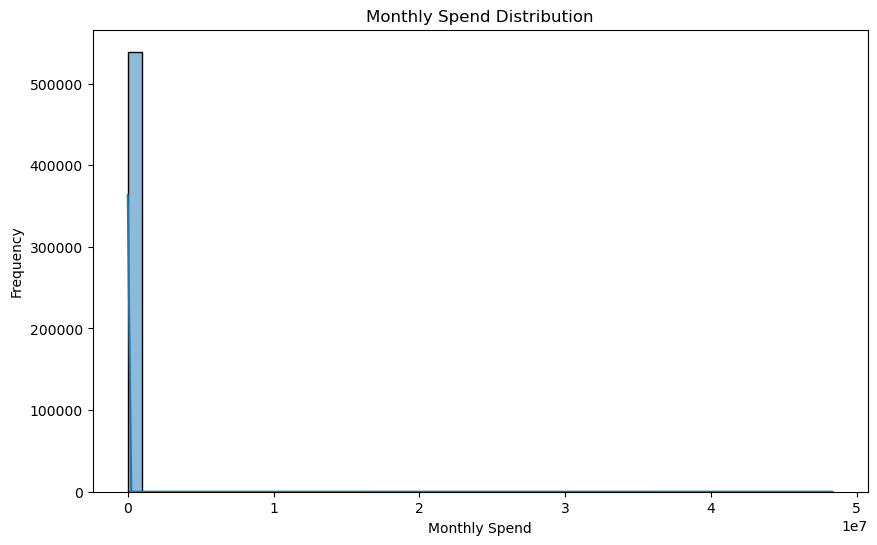

In [45]:
    # Visualize distributions
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['average_monthly_spend'], bins=50, kde=True)
plt.title('Monthly Spend Distribution')
plt.xlabel('Monthly Spend')
plt.ylabel('Frequency')
plt.show()

In [146]:
customer_data.head(5)

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
131072,131073,80154.0,11.87,38.73
131073,131074,26665.0,7.2,9.03
131074,131075,103594.0,19.76,16.72
131075,131076,38838.0,6.29,9.65
131076,131077,721.0,2.06,1.80


In [147]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']])
customer_data[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']] = scaled_features

# Derived metrics (if needed)
# e.g., customer_data['spend_per_visit'] = customer_data['monthly_spend'] / customer_data['monthly_visit_frequency']


In [94]:
# Model Selection (e.g., K-means clustering)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(customer_data[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']])

# Evaluate clustering performance
from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(customer_data[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']], customer_data['cluster'])
print("Silhouette Score:", silhouette_score)


Silhouette Score: 0.748362944482383


In [49]:
customer_data_cleaned.dropna(inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_28676\3780591301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data_cleaned.dropna(inplace=True)


In [55]:
import pandas as pd

# Load the dataset
customer_data = pd.read_csv('customer_dataset.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_28676\3294755354.py:4: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_data = pd.read_csv('customer_dataset.csv')


In [53]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def preprocess(df):
    columns = ['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']
    
    for column_name in columns:
        # Convert the column to float, coerce errors to NaN
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    
    # Count and print the number of NaN values before imputation
    na_count_before = df[columns].isna().sum()
    print(f"NaN count before imputation:\n{na_count_before}")
    
    # Apply Iterative Imputer
    imputer = IterativeImputer(max_iter=10, random_state=42)
    df[columns] = imputer.fit_transform(df[columns])
    
    # Count and print the number of NaN values after imputation
    na_count_after = df[columns].isna().sum()
    print(f"NaN count after imputation:\n{na_count_after}")

    # Convert the imputed numpy array back to DataFrame
    df[columns] = pd.DataFrame(df[columns], columns=columns)
    
    # Drop duplicates
    df.drop_duplicates(inplace=True)



    # Generate boxplots to identify outliers
    for column_name in columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[column_name])
        plt.title(f'Boxplot for {column_name} (Log Transformed)')
        plt.show()

    # Generate distribution plots
    for column_name in columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(df[column_name], kde=True)
        plt.title(f'Distribution Plot for {column_name} (Log Transformed)')
        plt.show()
    
    # Generate pair plots to visualize relationships between features
    sns.pairplot(df[columns])
    plt.suptitle('Pair Plot of Features (Log Transformed)', y=1.02)
    plt.show()
    
    # Generate correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap (Log Transformed)')
    plt.show()
    
    # Handle outliers using the IQR method
    for column_name in columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap the outliers
        df[column_name] = np.where(df[column_name] < lower_bound, lower_bound, df[column_name])
        df[column_name] = np.where(df[column_name] > upper_bound, upper_bound, df[column_name])
    
    # Apply Logarithmic Transformation
    for column_name in columns:
        df[column_name] = np.log1p(df[column_name])
    
    # Generate new features
    df['average_spend_per_visit'] = df['average_monthly_spend'] / df['average_monthly_visit_frequency']
    df['spend_per_basket_size'] = df['average_monthly_spend'] / df['average_monthly_basket_size']
    df['visit_frequency_per_basket_size'] = df['average_monthly_visit_frequency'] / df['average_monthly_basket_size']

    df['spend_per_visit_per_basket_size'] = df['average_spend_per_visit'] / df['average_monthly_basket_size']
    df['visit_frequency_to_spend_ratio'] = df['average_monthly_visit_frequency'] / df['average_monthly_spend']

    # Calculate percentiles
    percentiles = [25, 50, 75, 90]

    # Define thresholds for binary features based on percentiles
    thresholds_spend_per_visit = np.percentile(df['average_spend_per_visit'], percentiles)
    thresholds_visit_frequency = np.percentile(df['average_monthly_visit_frequency'], percentiles)

    # Create binary features based on thresholds
    for idx, percentile in enumerate(percentiles):
        df[f'spend_per_visit_above_{percentile}th'] = (df['average_spend_per_visit'] > thresholds_spend_per_visit[idx]).astype(int)
        df[f'visit_frequency_above_{percentile}th'] = (df['average_monthly_visit_frequency'] > thresholds_visit_frequency[idx]).astype(int)
    


    return df

NaN count before imputation:
average_monthly_spend              9387
average_monthly_visit_frequency    9333
average_monthly_basket_size        9286
dtype: int64
NaN count after imputation:
average_monthly_spend              0
average_monthly_visit_frequency    0
average_monthly_basket_size        0
dtype: int64


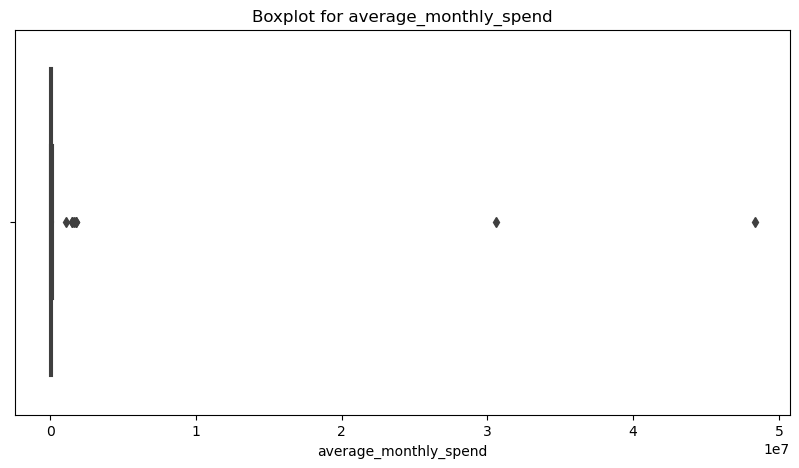

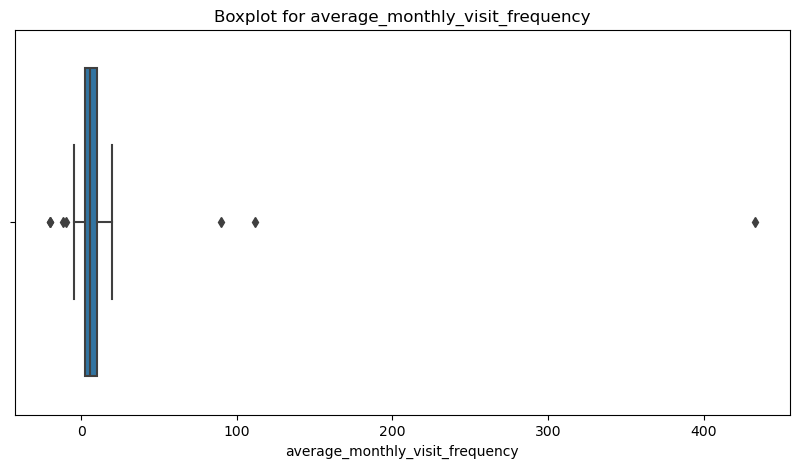

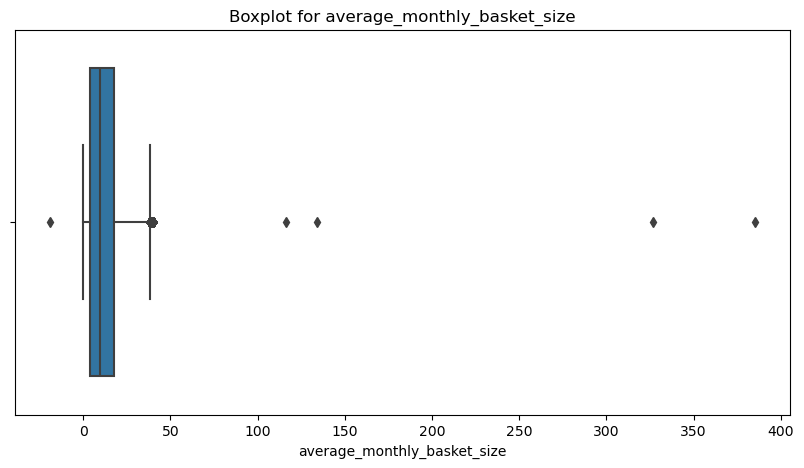

c:\Users\User\miniconda3\envs\featuren\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


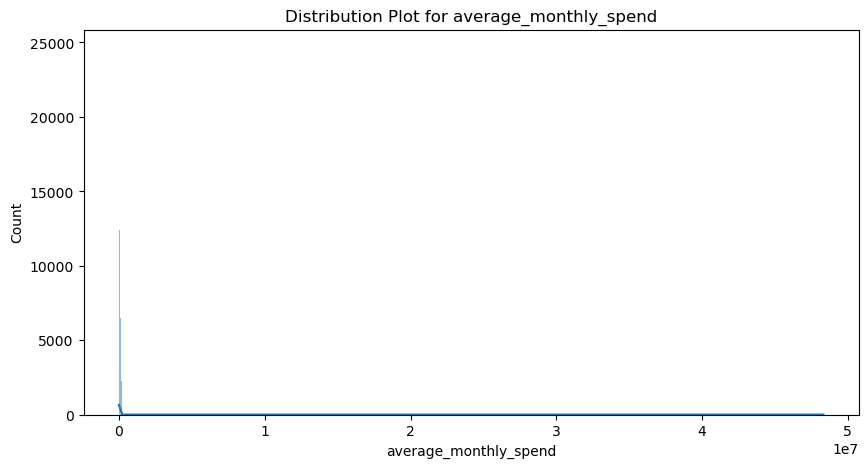

c:\Users\User\miniconda3\envs\featuren\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


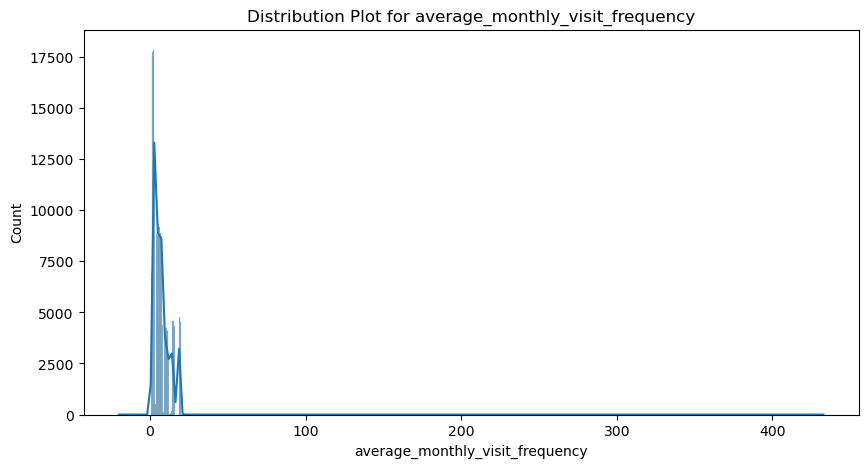

c:\Users\User\miniconda3\envs\featuren\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


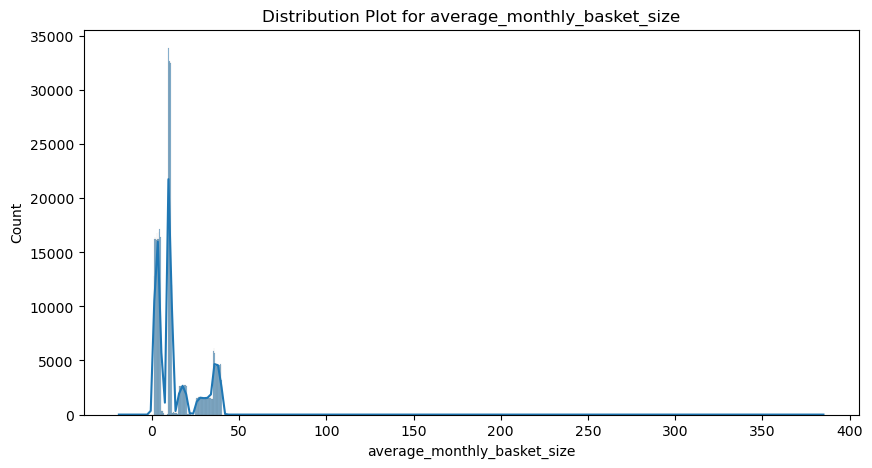

c:\Users\User\miniconda3\envs\featuren\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\miniconda3\envs\featuren\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\miniconda3\envs\featuren\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


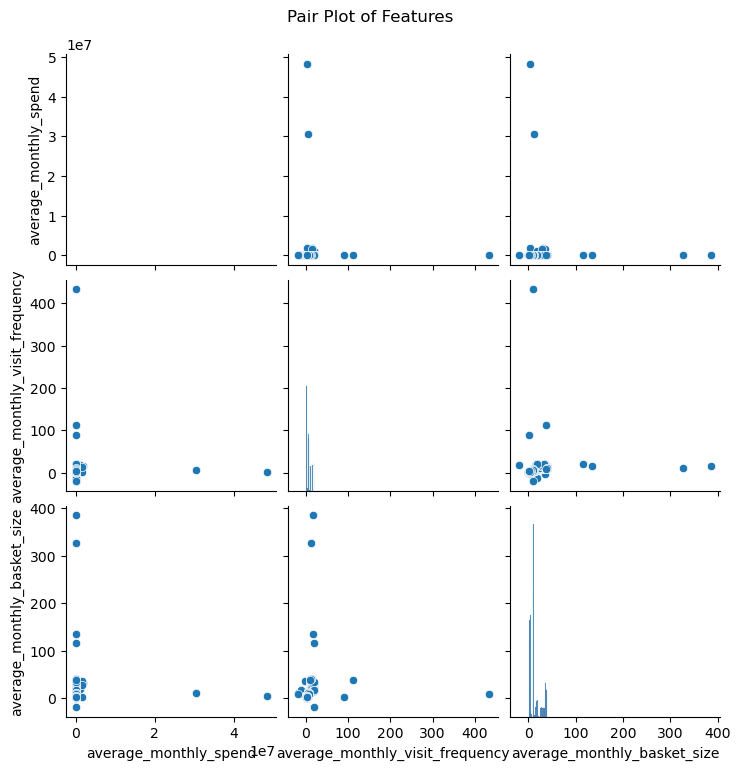

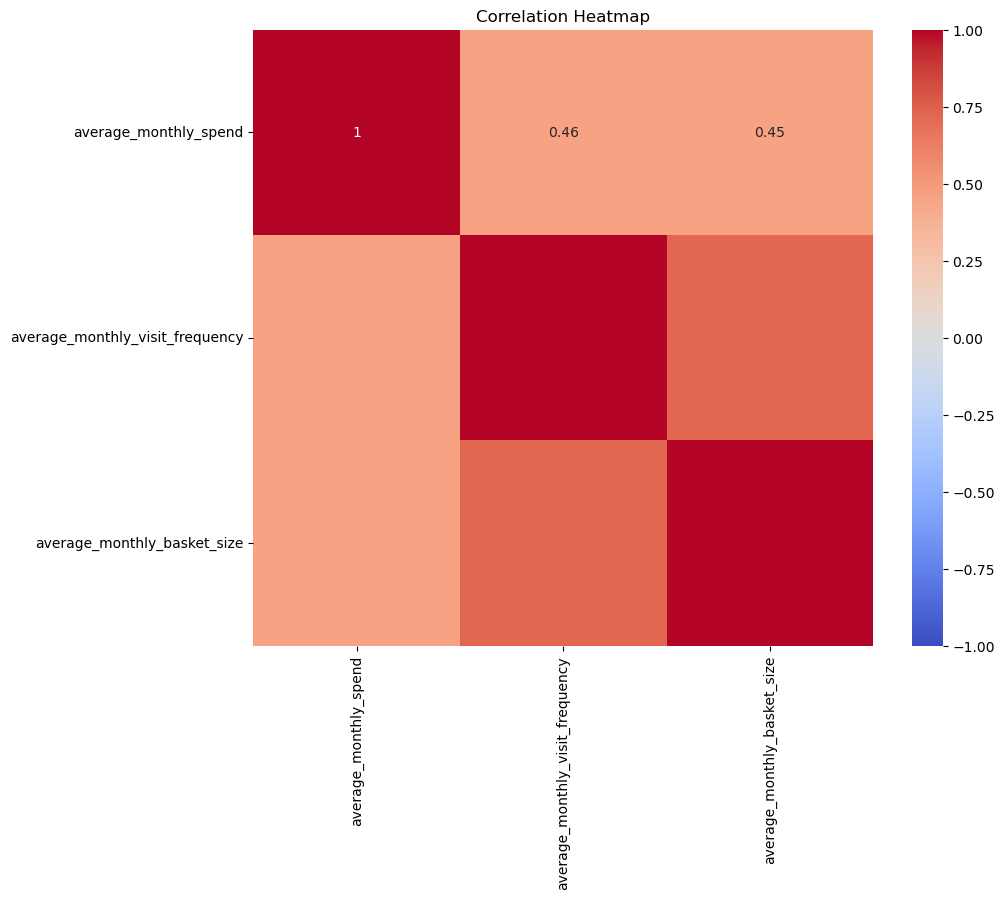

In [56]:
customer_data_cleaned = preprocess(customer_data)

In [ ]:
import numpy as np


customer_data_cleaned['average_spend_per_visit'] = customer_data_cleaned['average_monthly_spend'] / customer_data_cleaned['average_monthly_visit_frequency']
customer_data_cleaned['spend_per_basket_size'] = customer_data_cleaned['average_monthly_spend'] / customer_data_cleaned['average_monthly_basket_size']
customer_data_cleaned['visit_frequency_per_basket_size'] = customer_data_cleaned['average_monthly_visit_frequency'] / customer_data_cleaned['average_monthly_basket_size']

customer_data_cleaned['spend_per_visit_per_basket_size'] = customer_data_cleaned['average_spend_per_visit'] / customer_data_cleaned['average_monthly_basket_size']
customer_data_cleaned['visit_frequency_to_spend_ratio'] = customer_data_cleaned['average_monthly_visit_frequency'] / customer_data_cleaned['average_monthly_spend']

percentiles = [25, 50, 75, 90]

# Define thresholds for binary features based on percentiles
thresholds_spend_per_visit = np.percentile(customer_data_cleaned['average_spend_per_visit'], percentiles)
thresholds_visit_frequency = np.percentile(customer_data_cleaned['average_monthly_visit_frequency'], percentiles)

# Create binary features based on thresholds
for idx, percentile in enumerate(percentiles):
    customer_data_cleaned[f'spend_per_visit_above_{percentile}th'] = (customer_data_cleaned['average_spend_per_visit'] > thresholds_spend_per_visit[idx]).astype(int)
    customer_data_cleaned[f'visit_frequency_above_{percentile}th'] = (customer_data_cleaned['average_monthly_visit_frequency'] > thresholds_visit_frequency[idx]).astype(int)

In [50]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data_cleaned[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']])
customer_data_cleaned[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']] = scaled_features


# Model Selection (e.g., K-means clustering)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
customer_data_cleaned['cluster'] = kmeans.fit_predict(customer_data_cleaned[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']])

# Evaluate clustering performance
from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(customer_data_cleaned[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']], customer_data_cleaned['cluster'])
print("Silhouette Score:", silhouette_score)

C:\Users\User\AppData\Local\Temp\ipykernel_28676\1379326151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data_cleaned[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']] = scaled_features
C:\Users\User\AppData\Local\Temp\ipykernel_28676\1379326151.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data_cleaned['cluster'] = kmeans.fit_predict(customer_data_cleaned[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_

KeyboardInterrupt: 

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Assume customer_data_cleaned is your DataFrame
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data_cleaned[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']])
customer_data_cleaned[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']] = scaled_features

# Model Selection (Agglomerative Clustering)
agg_clustering = AgglomerativeClustering(n_clusters=5)
customer_data_cleaned['cluster'] = agg_clustering.fit_predict(customer_data_cleaned[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']])

# Evaluate clustering performance
silhouette_avg = silhouette_score(customer_data_cleaned[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']], customer_data_cleaned['cluster'])

print(f'Silhouette Score: {silhouette_avg}')
